In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jpegCompressor
from PIL import Image

In [57]:
# Create data: compress + decompress
files = path + np.array(['Lenna'] * 4 + ['img'] * 4) + np.array(['.png', '_D.png', '_GS.png', '_WD.png'] * 2)
decomp_images = dict().fromkeys(files)
for key in decomp_images:
    decomp_images[key] = []
print(decomp_images)
for file in files[0:1]:
    im = Image.open(file)
    for q in range(0, 100, 20):
        c = jpegCompressor.compress(np.array(im), q)
        r, g, b = jpegCompressor.decompress(c, q)
        r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
        d_img = Image.merge("RGB", (r, g, b))
        decomp_images[file].append(d_img)
    
    
 


{np.str_('./data/Lenna.png'): [], np.str_('./data/Lenna_D.png'): [], np.str_('./data/Lenna_GS.png'): [], np.str_('./data/Lenna_WD.png'): [], np.str_('./data/img.png'): [], np.str_('./data/img_D.png'): [], np.str_('./data/img_GS.png'): [], np.str_('./data/img_WD.png'): []}
[]
[]
[]
[]
[]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

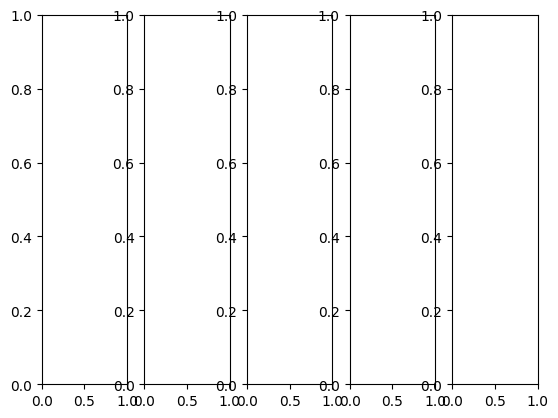

In [31]:
# img for dif quality
save_path = './decomp_images/'
quality = range(0, 100, 20)
size = 50
q = ['0', '20', '40', '60', '80']
for file in files:
    fig, ax = plt.subplots(1, len(list(quality)))
    i = 0
    for im in decomp_images[file]:
        ax[0, i].imshow(im)
        block = Image.fromarray(np.array(im)[:size, :size])
        ax[1, i].imshow(block)
        ax[0, i].set_title(f'quality = {q[i]}')
        ax[1, i].set_title(f'quality = {q[i]}')
        i+=1
    fig.savefig(save_path + file[6:])

In [56]:
# data for graphics
quality = range(0, 100, 5)


file_sizes = dict().fromkeys([file[7:][:-4] for file in files])
for i in file_sizes:
    file_sizes[i] = []

for file in files:
    im = Image.open(file)
    for q in quality:
        c = jpegCompressor.compress(np.array(im), q)
        file.sizes[file[7:][:-4]].append()
    


    

Lenna
Lenna_D
Lenna_GS
Lenna_WD
img
img_D
img_GS
img_WD


['./data/Lenna.png' './data/Lenna_D.png' './data/Lenna_GS.png'
 './data/Lenna_WD.png' './data/img.png' './data/img_D.png'
 './data/img_GS.png' './data/img_WD.png']


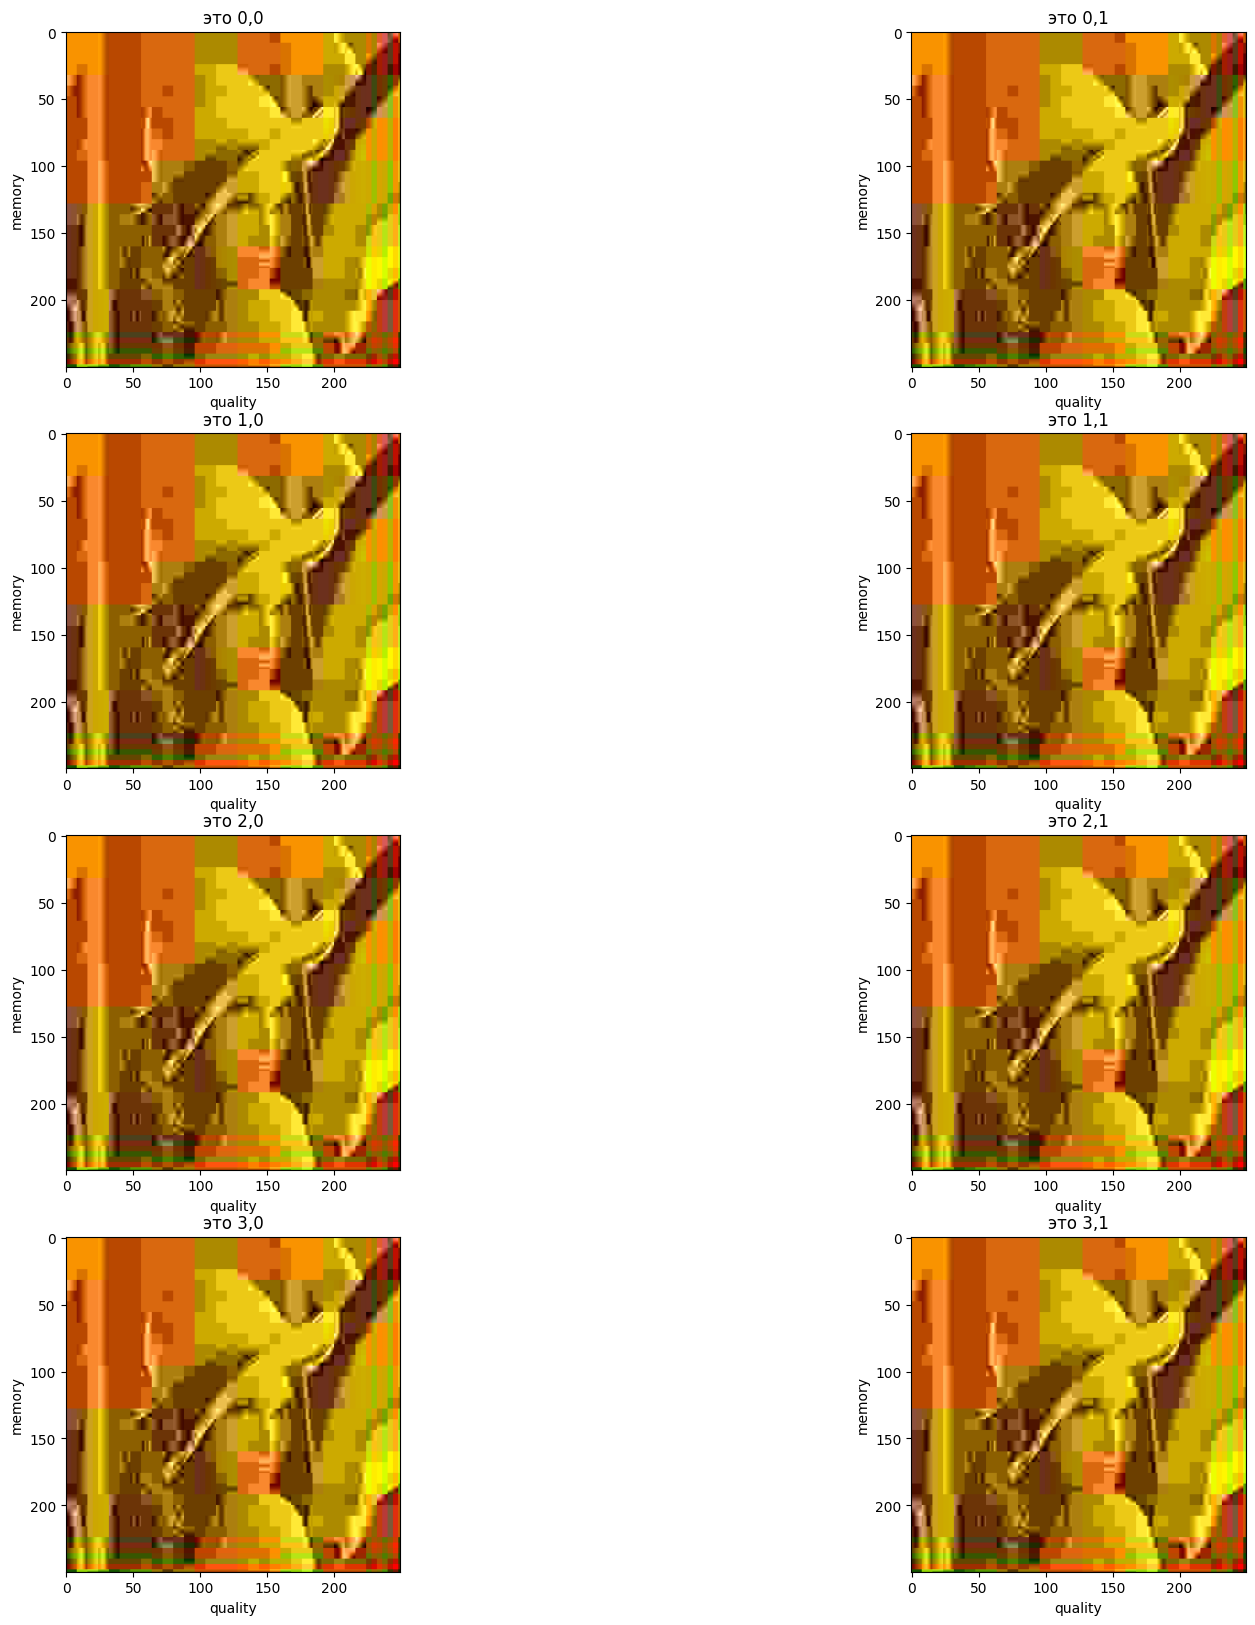

In [46]:
# graphics
file_iter = iter(file_sizes)
rows, cols = 4, 2
fig, ax = plt.subplots(rows, cols)
for i in range(rows):
    for j in range(cols):
        file = next(file_iter)
        ax[i, j].plot(np.array(quality), np.array(file_sizes[file]))
        ax[i, j].set_title(file)
        ax[i, j].set_xlabel('Quality, %')
        ax[i, j].set_xlabel('Size, bytes')
